<a href="https://colab.research.google.com/github/adityapanwar94/Data-Analysis-and-Process-Automation-DaPrA-/blob/drishti/SSL_ModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Dataset**

In [590]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Importing Libraries**

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC # for Support Vector Classification baseline model
from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [592]:
complete_dataset = pd.read_csv(r'/content/drive/MyDrive/eYSIP_Data/Refine_data(07-07-22).csv')
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 134 entries, Unnamed: 0 to GeekBench(OpenCL)_Avg
dtypes: float64(8), int64(126)
memory usage: 1.3 MB


In [593]:
complete_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [594]:
complete_dataset.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,...,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.00000,1293.000000
mean,1948.748647,8.448618,2.896429,1.960944,58.021655,0.279969,1.820572,1.488012,0.402939,2.948183,...,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831,5.033256,594.204756,1987.99536,10643.578500
std,560.509233,1.022721,3.185730,2.461915,55.657562,0.925495,1.859286,1.795907,1.124271,1.237172,...,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279,3.360911,307.263200,1158.25424,9952.252811
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1466.000000,8.114275,1.000000,0.500000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,388.250000,1219.75000,2648.250000
50%,1897.000000,8.577250,2.000000,1.250000,50.000000,0.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,650.500000,2051.00000,8271.250000
75%,2457.000000,9.007500,4.000000,2.750000,100.000000,0.000000,4.000000,4.000000,0.000000,4.000000,...,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,8.000000,826.000000,2768.50000,15825.750000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,16.000000,1405.500000,5625.25000,58047.500000


In [595]:
Actual_theme = pd.read_csv(r'/content/drive/MyDrive/eYSIP_Data/Final_Theme_Allot.csv')
Actual_theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team_id      1483 non-null   int64 
 1   Theme allot  1483 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


## **Checking up Unique Values**

In [596]:
def unique_chart(Dataset):
  uni_dict = {}
  uni_value ={}
  keys = Dataset.columns
  for i in keys:
    uni_dict[i] = Dataset[i].nunique()
    if Dataset[i].nunique() <= 10:
      uni_value[i] = Dataset[i].unique()
    else:
      uni_value[i] = None
  Unique = pd.DataFrame([uni_dict, uni_value]) 
  return (Unique)

In [597]:
Unique1 = unique_chart(Actual_theme)
print(Unique1.to_markdown())

|    |   team_id | Theme allot                                                               |
|---:|----------:|:--------------------------------------------------------------------------|
|  0 |      1483 | 6                                                                         |
|  1 |       nan | ['Strawberry Stacker (SS)' 'Dairy Bike (DB)' 'Agribot (AB)'               |
|    |           |  'Functional Weeder (FW)' 'Berryminator (BM)' 'Soil Monitoring Bot (SM)'] |


## **Normalizing the Dataset**

In [598]:
Grouped_dataC = complete_dataset.copy()

In [599]:
scaler = MinMaxScaler()
data_columns = Grouped_dataC.drop(['team_id'], axis=1).columns
data_columns

Index(['cgpa', 'onlineCourse', 'completeCourse', 'internetspeed<', 'Year_1.0',
       'Year_2.0', 'Year_3.0', 'Year_4.0', 'Gender_0.0', 'Gender_1.0',
       ...
       'Internet_option_freq_4', 'Internet_option_freq_5',
       'Department_category_0.0', 'Department_category_1.0',
       'Department_category_2.0', 'Department_category_3.0', 'Ram_Avg',
       'SingleCore_Avg', 'MultiCore_Avg', 'GeekBench(OpenCL)_Avg'],
      dtype='object', length=132)

In [600]:
data_scaled = pd.DataFrame(scaler.fit_transform(Grouped_dataC.drop(['team_id'], axis=1)), columns=data_columns)
data_scaled.head()

,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,Gender_1.0,...,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
0,0.843750,0.094017,0.035088,0.005,0.0,0.00,1.00,0.0,1.0,0.0,...,0.0,0.0,1.00,0.00,0.00,0.00,0.34375,0.555318,0.314919,0.039257
1,0.844350,0.196581,0.157895,0.250,0.0,0.00,1.00,0.0,1.0,0.0,...,0.0,0.0,0.75,0.25,0.00,0.00,0.37500,0.465137,0.329363,0.098217
2,0.885250,0.205128,0.192982,0.750,0.0,0.25,0.75,0.0,1.0,0.0,...,0.0,0.0,0.25,0.00,0.75,0.00,0.50000,0.641764,0.580730,0.392709
3,0.865000,0.196581,0.140351,1.000,0.0,0.00,0.00,1.0,1.0,0.0,...,0.0,0.0,0.00,0.00,0.75,0.25,0.75000,0.558520,0.659837,0.576967
4,0.754968,0.017094,0.017544,0.500,0.0,1.00,0.00,0.0,1.0,0.0,...,0.0,0.0,0.75,0.25,0.00,0.00,0.62500,0.569904,0.527888,0.645842


## **Principal Component Analysis**

In [673]:
flag = int(input("For recommender system select 1 and for allotment system select 0-"))



For recommender system select 1 and for allotment system select 0-0


In [674]:
if flag == 1:
  usefulcoldata = data_scaled.drop(['Gender_0.0', 'Gender_1.0', 'Gender_3.0', 'elsiLab_0.0', 'elsiLab_1.0', 'elsiLab_2.0', 
                                                          'ssc_board_0.0', 'ssc_board_1.0', 'ssc_board_2.0', 'ssc_board_3.0', 'ssc_board_4.0', 
                                                          'hsc_board_0.0', 'hsc_board_1.0', 'hsc_board_2.0', 'hsc_board_3.0', 'hsc_board_4.0', 
                                                         'workstation_1.0', 'workstation_2.0', 'Internet_option_freq_0', 
                                                          'Internet_option_freq_1', 'Internet_option_freq_2', 'Internet_option_freq_3', 
                                                          'Internet_option_freq_4', 'Internet_option_freq_5', 'IS_eLSI_0', 'IS_eLSI_1','onlineCourse',
       'cgpa', 'completeCourse', 'internetspeed<',
       'preference1_0.0', 'preference1_1.0', 'preference1_2.0',
       'preference1_3.0', 'preference1_4.0', 'preference1_5.0',
       'preference2_0.0', 'preference2_1.0', 'preference2_2.0',
       'preference2_3.0', 'preference2_4.0', 'preference2_5.0',
       'preference3_0.0', 'preference3_1.0', 'preference3_2.0',
       'preference3_3.0', 'preference3_4.0', 'preference3_5.0',
       'preference5_0.0', 'preference5_1.0', 'preference5_2.0',
       'preference5_3.0', 'preference5_4.0', 'preference5_5.0',
       'preference6_0.0', 'preference6_1.0', 'preference6_2.0',
       'preference6_3.0', 'preference6_4.0', 'preference6_5.0',
       'preference4_0.0', 'preference4_1.0', 'preference4_2.0',
       'preference4_3.0', 'preference4_4.0', 'preference4_5.0','Year_1.0', 'Year_2.0', 'Year_3.0', 'Year_4.0'], axis=1)
else:
  usefulcoldata = data_scaled.drop(['Gender_0.0', 'Gender_1.0', 'Gender_3.0', 'elsiLab_0.0', 'elsiLab_1.0', 'elsiLab_2.0', 
                                                          'ssc_board_0.0', 'ssc_board_1.0', 'ssc_board_2.0', 'ssc_board_3.0', 'ssc_board_4.0', 
                                                          'hsc_board_0.0', 'hsc_board_1.0', 'hsc_board_2.0', 'hsc_board_3.0', 'hsc_board_4.0', 
                                                         'workstation_1.0', 'workstation_2.0', 'Internet_option_freq_0', 
                                                          'Internet_option_freq_1', 'Internet_option_freq_2', 'Internet_option_freq_3', 
                                                          'Internet_option_freq_4', 'Internet_option_freq_5', 'IS_eLSI_0', 'IS_eLSI_1','onlineCourse',
       'cgpa', 'completeCourse', 'internetspeed<',
       'preference5_0.0', 'preference5_1.0', 'preference5_2.0',
       'preference5_3.0', 'preference5_4.0', 'preference5_5.0',
       'preference6_0.0', 'preference6_1.0', 'preference6_2.0',
       'preference6_3.0', 'preference6_4.0', 'preference6_5.0',
       'preference4_0.0', 'preference4_1.0', 'preference4_2.0',
       'preference4_3.0', 'preference4_4.0', 'preference4_5.0','Year_1.0', 'Year_2.0', 'Year_3.0', 'Year_4.0'], axis=1)

In [675]:
if flag == 1:

  usefulcoldata['Ram_Avg'] = usefulcoldata['Ram_Avg'].apply(lambda x: x*100)
  usefulcoldata['GeekBench(OpenCL)_Avg'] = usefulcoldata['GeekBench(OpenCL)_Avg'].apply(lambda x: x*100)
  # usefulcoldata['SingleCore_Avg'] = usefulcoldata['SingleCore_Avg'].apply(lambda x: x*100)
  # usefulcoldata['MultiCore_Avg'] = usefulcoldata['MultiCore_Avg'].apply(lambda x: x*100)

  usefulcoldata['Department_category_0.0'] = usefulcoldata['Department_category_0.0'].apply(lambda x: x*100)
  usefulcoldata['Department_category_1.0'] = usefulcoldata['Department_category_1.0'].apply(lambda x: x*100)
  usefulcoldata['Department_category_2.0'] = usefulcoldata['Department_category_2.0'].apply(lambda x: x*100)
  usefulcoldata['Department_category_3.0'] = usefulcoldata['Department_category_3.0'].apply(lambda x: x*0)

  usefulcoldata['Participation_Freq_1'] = usefulcoldata['Participation_Freq_1'].apply(lambda x: x*60)
  usefulcoldata['Participation_Freq_2'] = usefulcoldata['Participation_Freq_2'].apply(lambda x: x*80)
  usefulcoldata['Participation_Freq_3'] = usefulcoldata['Participation_Freq_3'].apply(lambda x: x*100)
  usefulcoldata['Participation_Freq_0'] = usefulcoldata['Participation_Freq_0'].apply(lambda x: x*0)
else:
  usefulcoldata['Ram_Avg'] = usefulcoldata['Ram_Avg'].apply(lambda x: x*100)
  usefulcoldata['GeekBench(OpenCL)_Avg'] = usefulcoldata['GeekBench(OpenCL)_Avg'].apply(lambda x: x*100)
  # usefulcoldata['SingleCore_Avg'] = usefulcoldata['SingleCore_Avg'].apply(lambda x: x*100)
  # usefulcoldata['MultiCore_Avg'] = usefulcoldata['MultiCore_Avg'].apply(lambda x: x*100)

  usefulcoldata['Department_category_0.0'] = usefulcoldata['Department_category_0.0'].apply(lambda x: x*100)
  usefulcoldata['Department_category_1.0'] = usefulcoldata['Department_category_1.0'].apply(lambda x: x*100)
  usefulcoldata['Department_category_2.0'] = usefulcoldata['Department_category_2.0'].apply(lambda x: x*100)
  usefulcoldata['Department_category_3.0'] = usefulcoldata['Department_category_3.0'].apply(lambda x: x*0)

  usefulcoldata['Participation_Freq_1'] = usefulcoldata['Participation_Freq_1'].apply(lambda x: x*60)
  usefulcoldata['Participation_Freq_2'] = usefulcoldata['Participation_Freq_2'].apply(lambda x: x*80)
  usefulcoldata['Participation_Freq_3'] = usefulcoldata['Participation_Freq_3'].apply(lambda x: x*100)
  usefulcoldata['Participation_Freq_0'] = usefulcoldata['Participation_Freq_0'].apply(lambda x: x*0)
  
  usefulcoldata['preference1_0.0'] = usefulcoldata['preference1_0.0'].apply(lambda x: x*80)
  usefulcoldata['preference1_1.0'] = usefulcoldata['preference1_1.0'].apply(lambda x: x*80)
  usefulcoldata['preference1_2.0'] = usefulcoldata['preference1_2.0'].apply(lambda x: x*80)
  usefulcoldata['preference1_3.0'] = usefulcoldata['preference1_3.0'].apply(lambda x: x*80)
  usefulcoldata['preference1_4.0'] = usefulcoldata['preference1_4.0'].apply(lambda x: x*80)
  usefulcoldata['preference1_5.0'] = usefulcoldata['preference1_5.0'].apply(lambda x: x*80)
  
  usefulcoldata['preference2_0.0'] = usefulcoldata['preference2_0.0'].apply(lambda x: x*40)
  usefulcoldata['preference2_1.0'] = usefulcoldata['preference2_1.0'].apply(lambda x: x*40)
  usefulcoldata['preference2_2.0'] = usefulcoldata['preference2_2.0'].apply(lambda x: x*40)
  usefulcoldata['preference2_3.0'] = usefulcoldata['preference2_3.0'].apply(lambda x: x*40)
  usefulcoldata['preference2_4.0'] = usefulcoldata['preference2_4.0'].apply(lambda x: x*40)
  usefulcoldata['preference2_5.0'] = usefulcoldata['preference2_5.0'].apply(lambda x: x*40)





In [ ]:
usefulcoldata.info()

In [677]:
usefulcoldata.head()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Participation_Freq_2,Participation_Freq_3,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
0,0.50,0.50,0.00,0.00,0.000000,1.00,0.00,0.00,0.00,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,34.375,0.555318,0.314919,3.925664
1,0.25,0.75,0.00,0.00,0.000000,0.50,0.00,0.25,0.25,0.0,...,20.0,0.0,75.0,25.0,0.0,0.0,37.500,0.465137,0.329363,9.821698
2,0.25,0.25,0.00,0.25,0.333333,0.00,0.00,0.25,0.75,0.0,...,0.0,0.0,25.0,0.0,75.0,0.0,50.000,0.641764,0.580730,39.270856
3,0.00,0.50,0.25,0.25,0.000000,0.00,0.25,0.75,0.00,0.0,...,0.0,0.0,0.0,0.0,75.0,0.0,75.000,0.558520,0.659837,57.696714
4,1.00,0.00,0.00,0.00,0.000000,0.75,0.25,0.00,0.00,0.0,...,0.0,0.0,75.0,25.0,0.0,0.0,62.500,0.569904,0.527888,64.584177


### **Weights for other columns**



```

# usefulcoldata['sub_ros_0.0'] = usefulcoldata['sub_ros_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_1.0'] = usefulcoldata['sub_ros_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_2.0'] = usefulcoldata['sub_ros_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_3.0'] = usefulcoldata['sub_ros_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_4.0'] = usefulcoldata['sub_ros_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_ip_0.0'] = usefulcoldata['sub_ip_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_1.0'] = usefulcoldata['sub_ip_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_2.0'] = usefulcoldata['sub_ip_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_3.0'] = usefulcoldata['sub_ip_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_4.0'] = usefulcoldata['sub_ip_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_emb_c_0.0'] = usefulcoldata['sub_emb_c_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_1.0'] = usefulcoldata['sub_emb_c_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_2.0'] = usefulcoldata['sub_emb_c_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_3.0'] = usefulcoldata['sub_emb_c_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_4.0'] = usefulcoldata['sub_emb_c_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_ml_0.0'] = usefulcoldata['sub_ml_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_1.0'] = usefulcoldata['sub_ml_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_2.0'] = usefulcoldata['sub_ml_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_3.0'] = usefulcoldata['sub_ml_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_4.0'] = usefulcoldata['sub_ml_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_ap_0.0'] = usefulcoldata['sub_ap_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_1.0'] = usefulcoldata['sub_ap_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_2.0'] = usefulcoldata['sub_ap_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_3.0'] = usefulcoldata['sub_ap_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_4.0'] = usefulcoldata['sub_ap_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_cs_0.0'] = usefulcoldata['sub_cs_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_1.0'] = usefulcoldata['sub_cs_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_2.0'] = usefulcoldata['sub_cs_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_3.0'] = usefulcoldata['sub_cs_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_4.0'] = usefulcoldata['sub_cs_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_mss_0.0'] = usefulcoldata['sub_mss_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_1.0'] = usefulcoldata['sub_mss_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_2.0'] = usefulcoldata['sub_mss_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_3.0'] = usefulcoldata['sub_mss_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_4.0'] = usefulcoldata['sub_mss_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_fpga_0.0'] = usefulcoldata['sub_fpga_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_1.0'] = usefulcoldata['sub_fpga_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_2.0'] = usefulcoldata['sub_fpga_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_3.0'] = usefulcoldata['sub_fpga_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_4.0'] = usefulcoldata['sub_fpga_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_mm_0.0'] = usefulcoldata['sub_mm_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_1.0'] = usefulcoldata['sub_mm_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_2.0'] = usefulcoldata['sub_mm_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_3.0'] = usefulcoldata['sub_mm_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_4.0'] = usefulcoldata['sub_mm_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_de_0.0'] = usefulcoldata['sub_de_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_1.0'] = usefulcoldata['sub_de_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_2.0'] = usefulcoldata['sub_de_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_3.0'] = usefulcoldata['sub_de_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_4.0'] = usefulcoldata['sub_de_4.0'].apply(lambda x: x*10)

# usefulcoldata['Year_1.0'] = usefulcoldata['Year_1.0'].apply(lambda x: x*70)
# usefulcoldata['Year_2.0'] = usefulcoldata['Year_2.0'].apply(lambda x: x*70)
# usefulcoldata['Year_3.0'] = usefulcoldata['Year_3.0'].apply(lambda x: x*70)
# usefulcoldata['Year_4.0'] = usefulcoldata['Year_4.0'].apply(lambda x: x*70)

# usefulcoldata['preference2_0.0'] = usefulcoldata['preference2_0.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_1.0'] = usefulcoldata['preference2_1.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_2.0'] = usefulcoldata['preference2_2.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_3.0'] = usefulcoldata['preference2_3.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_4.0'] = usefulcoldata['preference2_4.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_5.0'] = usefulcoldata['preference2_5.0'].apply(lambda x: x*5)
```







### **PCA over data**

In [678]:
pca = PCA(n_components=0.80,svd_solver='auto')
principalComponents = pca.fit_transform(usefulcoldata)
principalDf = pd.DataFrame(data = principalComponents)

In [679]:
principalDf.head()

,0,1,2,3,4,5,6
0,-54.859496,0.058990,-1.735339,55.308337,-52.411686,-18.549481,-2.787866
1,-23.252270,7.460964,-19.638428,54.971789,-48.861413,-15.225255,0.145878
2,30.560477,21.755090,57.683633,70.341832,-31.432516,-17.084401,-3.338884
3,53.121767,68.719807,57.717398,-28.173296,0.175681,-4.560195,-8.705148
4,-17.718908,41.459519,-13.393493,-46.578813,-19.785322,2.797688,-3.539753


In [680]:
pca.explained_variance_ratio_.cumsum()*100

array([22.93445425, 36.73707578, 49.51277328, 60.71221507, 69.69058994,
       76.03213585, 81.15390742])

Text(0, 0.5, 'Explained variance (%)')

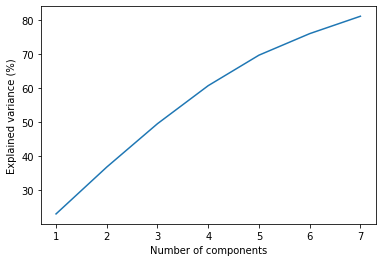

In [681]:
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


In [682]:
pca_components = abs(pca.components_)
# print(pca_components)

In [683]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {usefulcoldata.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Department_category_0.0', 'Department_category_1.0', 'Department_category_2.0', 'preference1_4.0']
Component 1: ['preference1_3.0', 'preference1_1.0', 'Department_category_2.0', 'Department_category_1.0']
Component 2: ['Department_category_2.0', 'Department_category_1.0', 'preference1_3.0', 'GeekBench(OpenCL)_Avg']
Component 3: ['preference1_0.0', 'preference1_1.0', 'preference1_3.0', 'preference1_4.0']
Component 4: ['preference1_4.0', 'preference1_0.0', 'Department_category_0.0', 'Department_category_2.0']
Component 5: ['preference1_2.0', 'preference1_5.0', 'preference1_0.0', 'preference1_4.0']
Component 6: ['preference1_5.0', 'preference1_2.0', 'preference2_4.0', 'preference2_3.0']


## **K-Means Algorithm with PCA**

**K-Means using PCA features**

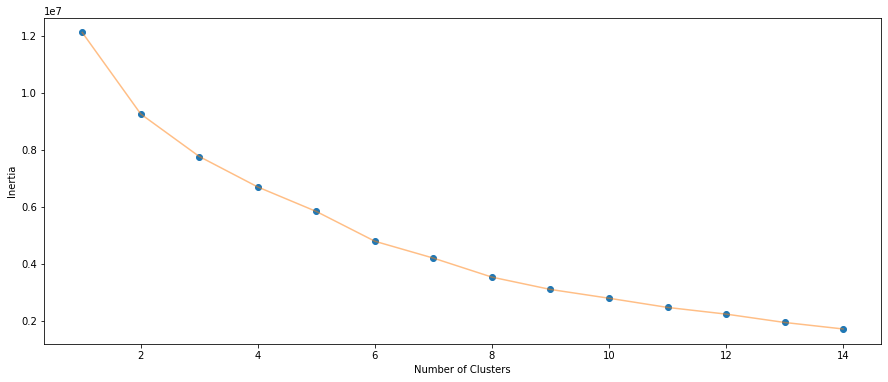

In [215]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf)
    wcss.append(km.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [216]:
algorithm_pca = (KMeans(n_clusters = 6, init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm_pca.fit(principalDf)
labels_pca = algorithm_pca.labels_
centroids_pca = algorithm_pca.cluster_centers_

In [217]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(principalDf, labels_pca)

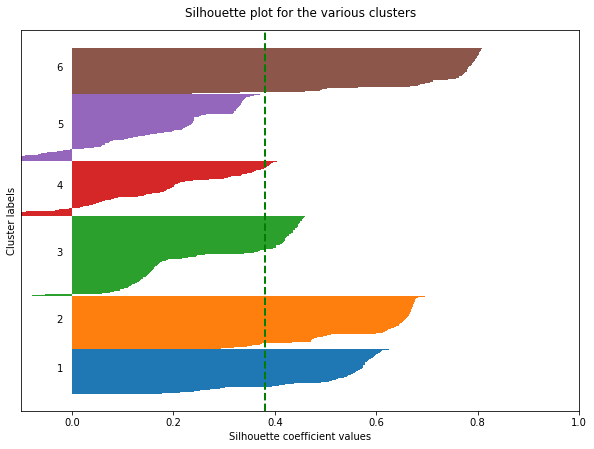

In [218]:
# for i, k in enumerate([2, 3, 4]):
fig, ax1 = plt.subplots(1)
fig.set_size_inches(10, 7)

centroids = algorithm_pca.cluster_centers_
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_pca)):
    cluster_silhouette_vals = silhouette_vals[labels_pca == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

## **K-Means Algorithm**

**K-Means using Direct Dataset**

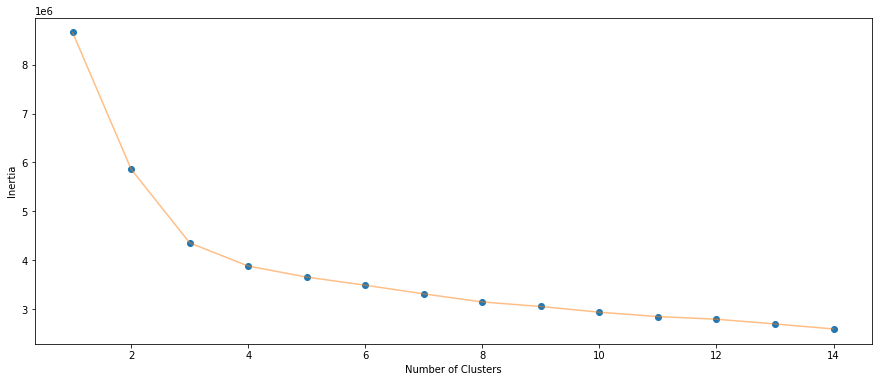

In [35]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(usefulcoldata)
    wcss.append(km.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [36]:
# kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
# y_kmeans = kmeans.predict(data_scaled)
# plt.scatter(principalDf[0], principalDf[1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

algorithm_data = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm_data.fit(usefulcoldata)
labels_data = algorithm_data.labels_
centroids_data = algorithm_data.cluster_centers_

# centroids_data

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(usefulcoldata, labels_data)
silhouette_vals

array([0.11485224, 0.08612391, 0.20818469, ..., 0.10048644, 0.36655513,
       0.27515861])

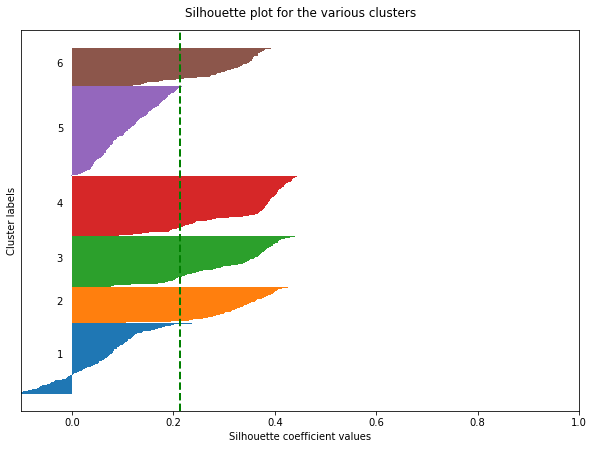

In [38]:
# for i, k in enumerate([2, 3, 4]):
fig, ax1 = plt.subplots(1)
fig.set_size_inches(10, 7)

centroids = algorithm_data.cluster_centers_
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_data)):
    cluster_silhouette_vals = silhouette_vals[labels_data == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

## **Cluster Analysis for PCA K-Means**

In [39]:
new_frame = pd.DataFrame(usefulcoldata)
new_frame['clusters'] = algorithm_pca.predict(principalDf)
new_frame['team_id'] = complete_dataset['team_id']

In [40]:
new_frame.head()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
0,0.50,0.50,0.00,0.00,0.000000,1.00,0.00,0.00,0.00,0.0,...,100.0,0.0,0.0,0.0,34.375,0.555318,0.314919,3.925664,1,1001
1,0.25,0.75,0.00,0.00,0.000000,0.50,0.00,0.25,0.25,0.0,...,75.0,25.0,0.0,0.0,37.500,0.465137,0.329363,9.821698,1,1002
2,0.25,0.25,0.00,0.25,0.333333,0.00,0.00,0.25,0.75,0.0,...,25.0,0.0,75.0,0.0,50.000,0.641764,0.580730,39.270856,2,1004
3,0.00,0.50,0.25,0.25,0.000000,0.00,0.25,0.75,0.00,0.0,...,0.0,0.0,75.0,0.0,75.000,0.558520,0.659837,57.696714,2,1005
4,1.00,0.00,0.00,0.00,0.000000,0.75,0.25,0.00,0.00,0.0,...,75.0,25.0,0.0,0.0,62.500,0.569904,0.527888,64.584177,3,1006


In [41]:
list(np.unique(labels_pca))

[0, 1, 2, 3, 4, 5]

In [42]:
# cluster_data = new_frame.loc[(new_frame['clusters'] == cluster_select)]
new_l = []
for label in list(np.unique(labels_pca)):
  cluster_frame = pd.DataFrame([])
  cluster_frame = new_frame.loc[(new_frame['clusters'] == label)]
  new_l.append(cluster_frame)

  


In [43]:
new_l[0].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.000000,226.000000,226.0,226.000000,226.000000,226.000000,226.000000,226.0,226.000000
mean,0.725664,0.202434,0.055310,0.011062,0.005900,0.613938,0.277655,0.092920,0.012168,0.002950,...,3.982301,92.809735,1.438053,0.0,28.608960,0.388000,0.314937,15.403938,0.0,2047.690265
std,0.347954,0.301302,0.175545,0.069836,0.070024,0.395129,0.338393,0.210012,0.075396,0.031288,...,9.169013,12.053735,5.833860,0.0,20.486254,0.221457,0.197977,16.226785,0.0,550.270852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1020.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,75.000000,0.000000,0.0,12.500000,0.240795,0.179903,3.282333,0.0,1564.750000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,...,0.000000,100.000000,0.000000,0.0,25.000000,0.403860,0.315342,8.719152,0.0,2046.000000
75%,1.000000,0.250000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,100.000000,0.000000,0.0,46.093750,0.550160,0.444858,23.310866,0.0,2563.250000
max,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,0.750000,0.333333,...,25.000000,100.000000,25.000000,0.0,87.500000,0.973675,0.945825,79.552952,0.0,2965.000000


In [44]:
new_l[1].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.0,337.000000,337.000000,337.000000,337.000000,337.0,337.000000
mean,0.618694,0.290059,0.071217,0.017804,0.001978,0.570475,0.309347,0.091246,0.025223,0.003956,...,94.287834,3.560831,1.409496,0.0,29.469585,0.415592,0.340221,15.948123,1.0,1913.842730
std,0.374015,0.329972,0.173941,0.094777,0.025641,0.383878,0.321886,0.191964,0.106145,0.036153,...,10.512051,8.750341,5.774917,0.0,19.887825,0.218520,0.202420,15.220736,0.0,570.128684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,75.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1001.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,12.500000,0.268232,0.201858,4.033335,1.0,1456.000000
50%,0.750000,0.250000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,25.000000,0.450551,0.355718,11.630561,1.0,1834.000000
75%,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,43.750000,0.578975,0.484156,23.695250,1.0,2417.000000
max,1.000000,1.000000,1.000000,0.750000,0.333333,1.000000,1.000000,1.000000,1.000000,0.333333,...,100.000000,25.000000,25.000000,0.0,75.000000,0.890075,0.891205,85.590680,1.0,2968.000000


In [45]:
new_l[2].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,...,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.0,192.000000
mean,0.575521,0.286458,0.121094,0.011719,0.005208,0.610677,0.247396,0.123698,0.016927,0.0,...,3.515625,2.604167,89.192708,0.0,35.579427,0.438617,0.383740,25.066709,2.0,1912.703125
std,0.380513,0.308007,0.237207,0.058834,0.041448,0.369559,0.287148,0.210952,0.085077,0.0,...,8.713579,7.656882,15.468236,0.0,23.667317,0.205897,0.207634,21.136592,0.0,554.615985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,50.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,1004.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,75.000000,0.0,12.500000,0.299404,0.247467,6.457535,2.0,1426.250000
50%,0.750000,0.250000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.0,...,0.000000,0.000000,100.000000,0.0,37.500000,0.487193,0.397693,21.020285,2.0,1882.500000
75%,1.000000,0.500000,0.250000,0.000000,0.000000,1.000000,0.500000,0.250000,0.000000,0.0,...,0.000000,0.000000,100.000000,0.0,50.000000,0.593783,0.523077,38.195120,2.0,2387.000000
max,1.000000,1.000000,1.000000,0.500000,0.333333,1.000000,1.000000,1.000000,0.750000,0.0,...,25.000000,25.000000,100.000000,0.0,100.000000,0.807542,0.900671,100.000000,2.0,2951.000000


In [46]:
new_l[3].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.0,134.000000
mean,0.576493,0.294776,0.097015,0.031716,0.0,0.565299,0.304104,0.098881,0.027985,0.004975,...,91.977612,2.611940,1.865672,0.0,25.373134,0.328799,0.260989,13.622137,3.0,2082.179104
std,0.380724,0.332809,0.209973,0.138540,0.0,0.394903,0.319130,0.201075,0.109082,0.040570,...,13.914598,7.675672,6.594360,0.0,20.533320,0.231749,0.199926,16.191271,0.0,577.896104
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.0,1006.000000
25%,0.250000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,...,75.000000,0.000000,0.000000,0.0,1.562500,0.103967,0.073019,1.169301,3.0,1588.500000
50%,0.750000,0.250000,0.000000,0.000000,0.0,0.500000,0.250000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,25.000000,0.376290,0.269232,7.907102,3.0,2162.000000
75%,1.000000,0.500000,0.187500,0.000000,0.0,1.000000,0.500000,0.187500,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,37.500000,0.514185,0.417048,20.565808,3.0,2595.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.333333,...,100.000000,25.000000,25.000000,0.0,81.250000,0.792067,0.761611,90.677462,3.0,2971.000000


In [47]:
new_l[4].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.0,133.000000
mean,0.612782,0.319549,0.058271,0.007519,0.002506,0.505639,0.330827,0.127820,0.031955,0.005013,...,90.977444,4.135338,1.503759,0.0,33.317669,0.462799,0.388449,18.433662,4.0,1920.751880
std,0.363415,0.327631,0.140640,0.052763,0.028904,0.369872,0.313142,0.214566,0.116830,0.057807,...,13.877967,9.323953,5.966604,0.0,18.729816,0.209526,0.199844,15.648949,0.0,558.778557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.0,1022.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,75.000000,0.000000,0.000000,0.0,25.000000,0.360014,0.276565,7.740213,4.0,1406.000000
50%,0.750000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,37.500000,0.474208,0.389494,13.743486,4.0,1843.000000
75%,1.000000,0.500000,0.000000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,50.000000,0.627179,0.507044,26.340066,4.0,2379.000000
max,1.000000,1.000000,0.750000,0.500000,0.333333,1.000000,1.000000,1.000000,0.750000,0.666667,...,100.000000,25.000000,25.000000,0.0,87.500000,1.000000,1.000000,77.131229,4.0,2949.000000


In [48]:
new_l[5].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.000000,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,271.0,271.000000
mean,0.607934,0.296125,0.059041,0.026753,0.003690,0.540590,0.309041,0.107011,0.031365,0.006150,...,31.365314,26.107011,19.095941,0.0,35.482011,0.476290,0.408889,21.264814,5.0,1882.944649
std,0.353058,0.298443,0.133408,0.105296,0.034941,0.360958,0.309901,0.184056,0.127052,0.066998,...,20.266268,20.608152,19.536623,0.0,20.829854,0.202961,0.198658,16.365156,0.0,536.255392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.0,1010.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,25.000000,0.000000,0.000000,0.0,18.750000,0.364105,0.263766,6.809940,5.0,1424.500000
50%,0.750000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,...,25.000000,25.000000,25.000000,0.0,37.500000,0.511206,0.420826,19.289806,5.0,1844.000000
75%,1.000000,0.500000,0.000000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,...,50.000000,50.000000,25.000000,0.0,50.000000,0.618997,0.539087,31.837934,5.0,2364.000000
max,1.000000,1.000000,0.750000,0.750000,0.333333,1.000000,1.000000,0.750000,1.000000,1.000000,...,50.000000,50.000000,50.000000,0.0,100.000000,0.864995,0.934936,75.959344,5.0,2964.000000


## **Creating dataset for the model**

In [684]:
ModelData = pd.DataFrame([])

In [685]:
import copy
ModelData = copy.deepcopy(principalDf)

In [686]:
ModelData.head()

,0,1,2,3,4,5,6
0,-54.859496,0.058990,-1.735339,55.308337,-52.411686,-18.549481,-2.787866
1,-23.252270,7.460964,-19.638428,54.971789,-48.861413,-15.225255,0.145878
2,30.560477,21.755090,57.683633,70.341832,-31.432516,-17.084401,-3.338884
3,53.121767,68.719807,57.717398,-28.173296,0.175681,-4.560195,-8.705148
4,-17.718908,41.459519,-13.393493,-46.578813,-19.785322,2.797688,-3.539753


In [687]:
new_col = []
for i in ModelData.columns:
  temp = f'Component{i}'
  new_col.append(temp)

In [688]:
ModelData.columns = new_col

In [689]:
ModelData.head()

,Component0,Component1,Component2,Component3,Component4,Component5,Component6
0,-54.859496,0.058990,-1.735339,55.308337,-52.411686,-18.549481,-2.787866
1,-23.252270,7.460964,-19.638428,54.971789,-48.861413,-15.225255,0.145878
2,30.560477,21.755090,57.683633,70.341832,-31.432516,-17.084401,-3.338884
3,53.121767,68.719807,57.717398,-28.173296,0.175681,-4.560195,-8.705148
4,-17.718908,41.459519,-13.393493,-46.578813,-19.785322,2.797688,-3.539753


In [690]:
ModelData['clusters'] = new_frame['clusters']

In [691]:
ModelData['team_id'] = new_frame['team_id']

In [692]:
ModelData = pd.merge(ModelData,Actual_theme,how='left', on = 'team_id')

In [693]:
ModelData['Theme allot'].replace(['Strawberry Stacker (SS)','Dairy Bike (DB)','Agribot (AB)',
                                  'Functional Weeder (FW)','Berryminator (BM)','Soil Monitoring Bot (SM)'],[0,3,5,2,4,1],inplace=True)

In [694]:
ModelData.head()

,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot
0,-54.859496,0.058990,-1.735339,55.308337,-52.411686,-18.549481,-2.787866,1,1001,0
1,-23.252270,7.460964,-19.638428,54.971789,-48.861413,-15.225255,0.145878,1,1002,0
2,30.560477,21.755090,57.683633,70.341832,-31.432516,-17.084401,-3.338884,2,1004,0
3,53.121767,68.719807,57.717398,-28.173296,0.175681,-4.560195,-8.705148,2,1005,3
4,-17.718908,41.459519,-13.393493,-46.578813,-19.785322,2.797688,-3.539753,3,1006,5


In [695]:
ModelData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1292
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Component0   1293 non-null   float64
 1   Component1   1293 non-null   float64
 2   Component2   1293 non-null   float64
 3   Component3   1293 non-null   float64
 4   Component4   1293 non-null   float64
 5   Component5   1293 non-null   float64
 6   Component6   1293 non-null   float64
 7   clusters     1293 non-null   int32  
 8   team_id      1293 non-null   int64  
 9   Theme allot  1293 non-null   int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 106.1 KB


## **Manual Labelling**

### **Creating Reference Dictionary**



```
Department_category = { 'Electronics' : 0,
                        'Computers' : 1, 
                        'Mechanical' : 2,
                        'Others' : 3,
                        }
```
```
Labels = { 'SS' : 0,
           'SM' : 1,
           'FW' : 2,
           'DB' : 3,
           'BM' : 4,
           'AB' : 5
}
```



### **Setting up labels from eyantra data**

In [696]:
ModelData[ModelData['team_id']==1066]

,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot
40,70.479705,-8.574571,-64.225851,13.508036,9.78983,62.505348,-55.817133,0,1066,2


In [697]:
ModelData["Labels"] = np.nan

In [698]:
ModelData.head()

,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot,Labels
0,-54.859496,0.058990,-1.735339,55.308337,-52.411686,-18.549481,-2.787866,1,1001,0,NaN
1,-23.252270,7.460964,-19.638428,54.971789,-48.861413,-15.225255,0.145878,1,1002,0,NaN
2,30.560477,21.755090,57.683633,70.341832,-31.432516,-17.084401,-3.338884,2,1004,0,NaN
3,53.121767,68.719807,57.717398,-28.173296,0.175681,-4.560195,-8.705148,2,1005,3,NaN
4,-17.718908,41.459519,-13.393493,-46.578813,-19.785322,2.797688,-3.539753,3,1006,5,NaN


In [699]:
ModelData['Labels'][ModelData['team_id']==1066] = 2
ModelData['Labels'][ModelData['team_id']==1410] = 2
ModelData['Labels'][ModelData['team_id']==1023] = 2

ModelData['Labels'][ModelData['team_id']==1059] = 0
ModelData['Labels'][ModelData['team_id']==1126] = 0
ModelData['Labels'][ModelData['team_id']==1090] = 0

ModelData['Labels'][ModelData['team_id']==2765] = 1
ModelData['Labels'][ModelData['team_id']==1332] = 1
ModelData['Labels'][ModelData['team_id']==1361] = 1

ModelData['Labels'][ModelData['team_id']==1341] = 3
ModelData['Labels'][ModelData['team_id']==1245] = 3
ModelData['Labels'][ModelData['team_id']==1016] = 3

ModelData['Labels'][ModelData['team_id']==1067] = 4
ModelData['Labels'][ModelData['team_id']==1333] = 4
ModelData['Labels'][ModelData['team_id']==2936] = 4

ModelData['Labels'][ModelData['team_id']==1217] = 5
ModelData['Labels'][ModelData['team_id']==1064] = 5
ModelData['Labels'][ModelData['team_id']==2866] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [700]:
ModelData['Labels'].replace(np.nan, -1, inplace=True)

In [701]:
ModelData[ModelData['Labels']!=-1]

,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot,Labels
11,54.259504,34.586507,68.492304,26.273227,23.886726,47.441645,63.761942,2,1016,3,3.0
16,-52.927076,-0.901243,2.918760,8.966361,-14.073525,75.927176,-60.566797,1,1023,2,2.0
36,-54.891265,9.394671,-7.852524,51.351376,-52.112147,-18.440411,4.567350,1,1059,0,0.0
38,66.222735,-33.357741,104.932426,-3.574496,4.882481,1.232866,-8.120455,2,1064,5,5.0
40,70.479705,-8.574571,-64.225851,13.508036,9.789830,62.505348,-55.817133,0,1066,2,2.0
41,65.321809,-32.263693,96.396926,-16.457999,10.575686,-2.747142,-2.006913,2,1067,4,4.0
55,6.018878,4.754425,4.726670,62.811908,-41.841925,-17.280693,-2.515013,5,1090,0,0.0
71,-21.920953,1.759069,-17.287345,52.707896,-50.668709,-8.228620,-7.400200,1,1126,0,0.0
121,72.327156,44.447655,-67.401587,-35.489065,-4.090900,-8.103836,-0.116034,0,1217,5,5.0
142,50.772375,69.596566,53.062756,-29.804384,3.360501,-9.743143,-8.633622,2,1245,3,3.0


## **Implement SSL for labelling**

In [702]:
ModelData.head()

,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot,Labels
0,-54.859496,0.058990,-1.735339,55.308337,-52.411686,-18.549481,-2.787866,1,1001,0,-1.0
1,-23.252270,7.460964,-19.638428,54.971789,-48.861413,-15.225255,0.145878,1,1002,0,-1.0
2,30.560477,21.755090,57.683633,70.341832,-31.432516,-17.084401,-3.338884,2,1004,0,-1.0
3,53.121767,68.719807,57.717398,-28.173296,0.175681,-4.560195,-8.705148,2,1005,3,-1.0
4,-17.718908,41.459519,-13.393493,-46.578813,-19.785322,2.797688,-3.539753,3,1006,5,-1.0


In [703]:
Shuffled_data = ModelData.sample(frac=1, random_state=1).reset_index()

In [704]:
Shuffled_data.head()

,index,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot,Labels
0,966,79.773588,-69.979513,-38.928870,-28.402235,-0.005433,-6.681672,1.601602,0,2453,4,-1.0
1,647,59.972748,29.793648,33.223399,67.222148,-23.827987,-21.779601,3.333500,2,1901,0,-1.0
2,60,47.094558,54.353240,1.056032,-36.099312,-2.622797,-12.235668,-4.666505,5,1106,3,-1.0
3,936,27.643555,7.689321,-37.852916,56.186423,-36.745370,-24.233752,5.971368,5,2409,0,-1.0
4,948,58.329517,0.958460,-54.156725,54.431617,-30.828009,-22.624193,-2.116945,0,2426,0,-1.0


In [705]:
labelled_dataset = Shuffled_data[Shuffled_data['Labels']!=-1]

In [706]:
labelled_dataset.shape

(18, 12)

In [707]:
X_train_labelled = labelled_dataset.drop(['Theme allot', 'Labels', 'team_id'],axis=1)

In [708]:
y_train_labelled = labelled_dataset['Labels']

In [709]:
print(X_train_labelled.shape, y_train_labelled.shape)

(18, 9) (18,)


In [710]:
unlabelled_dataset = Shuffled_data[Shuffled_data['Labels']==-1]

In [711]:
unlabelled_dataset

,index,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot,Labels
0,966,79.773588,-69.979513,-38.928870,-28.402235,-0.005433,-6.681672,1.601602,0,2453,4,-1.0
1,647,59.972748,29.793648,33.223399,67.222148,-23.827987,-21.779601,3.333500,2,1901,0,-1.0
2,60,47.094558,54.353240,1.056032,-36.099312,-2.622797,-12.235668,-4.666505,5,1106,3,-1.0
3,936,27.643555,7.689321,-37.852916,56.186423,-36.745370,-24.233752,5.971368,5,2409,0,-1.0
4,948,58.329517,0.958460,-54.156725,54.431617,-30.828009,-22.624193,-2.116945,0,2426,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1288,715,-57.153223,-3.980399,-3.497641,8.961009,-4.771648,43.938257,63.462425,1,1988,3,-1.0
1289,905,-54.039668,45.684377,-10.177454,-48.767084,-20.683132,-14.353451,-1.994787,3,2358,3,-1.0
1290,1096,-53.894467,45.779121,-5.959207,-43.684653,-17.206716,-6.790873,-3.443661,3,2641,2,-1.0
1291,235,-73.889754,-3.573323,-9.666384,18.978884,58.136406,-17.969096,-3.122099,1,1356,1,-1.0


In [712]:
train_pct_index = int(0.8 * len(unlabelled_dataset))
X_train, X_test = unlabelled_dataset[:train_pct_index], unlabelled_dataset[train_pct_index:]

In [713]:
print(X_train.shape, X_test.shape)

(1020, 12) (255, 12)


In [714]:
y_train = X_train['Labels']

In [715]:
y_train = y_train.append(y_train_labelled)

In [716]:
teamids = list(X_test['team_id'])

In [717]:
y_test = X_test['Theme allot']

In [718]:
X_train = X_train.drop(['Theme allot', 'Labels', 'team_id'], axis=1)
X_test = X_test.drop(['Theme allot', 'Labels', 'team_id'], axis=1)

In [719]:
X_train = X_train.append(X_train_labelled)

In [720]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1038, 9)
y_train (1038,)
X_test (255, 9)
y_test (255,)


## **Label Propagation**

In [721]:
def label_prop_test(kernel, params_list, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 0, 0
    roc_scores = []
    if kernel == 'rbf':
        for g in params_list:
            lp = LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=100000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test), multi_class='ovo'))
    plt.figure(figsize=(16,8));
    plt.plot(params_list, roc_scores)
    plt.title('Label Propagation ROC AUC with ' + kernel + ' kernel')
    plt.show()
    print('Best metrics value is at {}'.format(params_list[np.argmax(roc_scores)]))

<Figure size 1440x720 with 0 Axes>

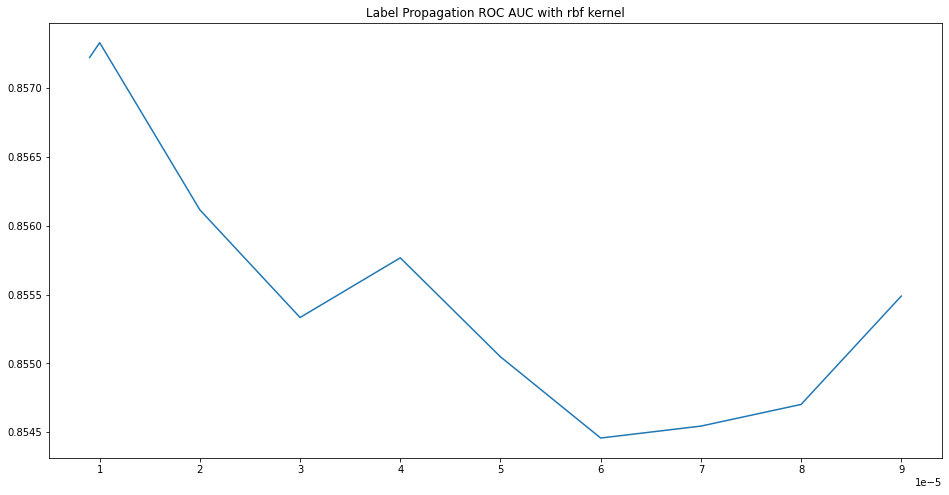

Best metrics value is at 1e-05


In [722]:
gammas = [9e-6, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5]
label_prop_test('rbf', gammas, X_train.drop(['index'],axis=1), X_test.drop(['index'],axis=1), y_train, y_test)

In [723]:
label_prop_rbf = LabelPropagation(kernel='rbf', 
                              gamma=1e-05, 
                              n_neighbors=0, 
                              max_iter=100000, 
                              tol=0.0001, 
                              n_jobs=-1, 
                             )
label_prop_rbf.fit(X_train.drop(['index'],axis=1), y_train)

LabelPropagation(gamma=1e-05, max_iter=100000, n_jobs=-1, n_neighbors=0,
                 tol=0.0001)

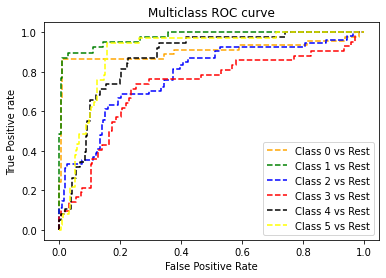

In [724]:
fpr = {}
tpr = {}
thresh ={}
roc_list = []
n_class = 6
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, label_prop_rbf.predict_proba(X_test.drop(['index'],axis=1))[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [725]:
print(classification_report(y_test,label_prop_rbf.predict(X_test.drop(['index'],axis=1))))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30        45
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        54
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        37

    accuracy                           0.18       255
   macro avg       0.03      0.17      0.05       255
weighted avg       0.03      0.18      0.05       255



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


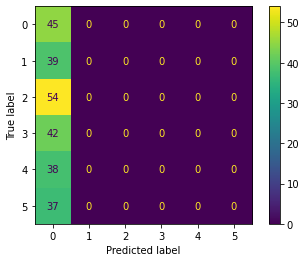

In [726]:
cm= confusion_matrix(y_test,label_prop_rbf.predict(X_test.drop(['index'],axis=1)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [570]:
y_pred = label_prop_rbf.predict(X_test.drop(['index'],axis=1))

## **Label Spreading**

In [727]:
def labels_spread_test(kernel, hyperparam, alphas, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 0, 0
    roc_scores = []
    if kernel == 'rbf':
        g = hyperparam
    for alpha in alphas:
        ls = LabelSpreading(kernel=kernel, n_neighbors=n, gamma=g, alpha=alpha, max_iter=1000, tol=0.001)
        ls.fit(X_train, y_train)
        roc_scores.append(roc_auc_score(y_test, ls.predict_proba(X_test), multi_class='ovo'))
    plt.figure(figsize=(16,8));
    plt.plot(alphas, roc_scores);
    plt.title('Label Spreading ROC AUC with ' + kernel + ' kernel')
    plt.show();
    print('Best metrics value is at {}'.format(alphas[np.argmax(roc_scores)]))

<Figure size 1440x720 with 0 Axes>

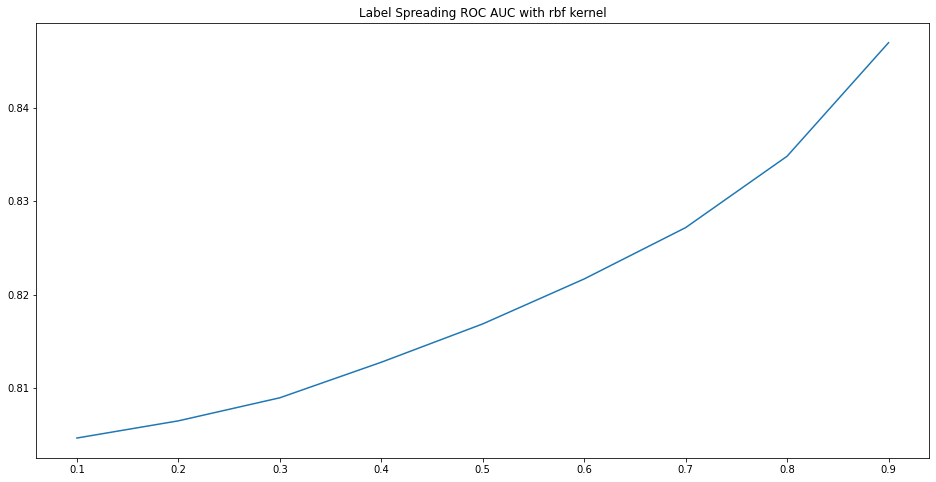

Best metrics value is at 0.9


In [728]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  
labels_spread_test('rbf', 9e-06, alphas,  X_train.drop(['index'],axis=1), X_test.drop(['index'],axis=1), y_train, y_test)

In [729]:
results = []
ls_rbf = LabelSpreading(kernel='rbf', gamma=9e-06, alpha=0.9, max_iter=1000, tol=0.001)
ls_rbf.fit(X_train.drop(['index'],axis=1), y_train)

LabelSpreading(alpha=0.9, gamma=9e-06, max_iter=1000)

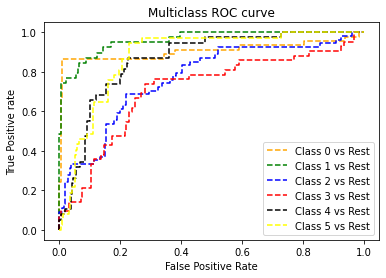

In [730]:
fpr = {}
tpr = {}
thresh ={}
roc_list = []
n_class = 6
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, ls_rbf.predict_proba(X_test.drop(['index'],axis=1))[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [731]:
print(classification_report(y_test,ls_rbf.predict(X_test.drop(['index'],axis=1))))

              precision    recall  f1-score   support

           0       0.19      1.00      0.31        45
           1       1.00      0.33      0.50        39
           2       0.00      0.00      0.00        54
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        37

    accuracy                           0.23       255
   macro avg       0.20      0.22      0.14       255
weighted avg       0.19      0.23      0.13       255



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


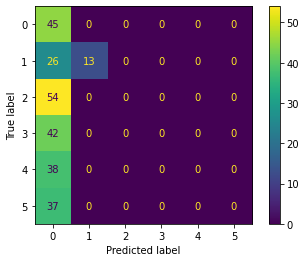

In [732]:
cm= confusion_matrix(y_test,ls_rbf.predict(X_test.drop(['index'],axis=1)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## **Meta Estimator**

In [733]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [734]:
svc = SVC(probability=True, gamma="auto")
clf=RandomForestClassifier()

In [735]:
self_training_model = SelfTrainingClassifier(base_estimator=clf)

In [736]:
self_training_model.fit(X_train.drop(['index'],axis=1), y_train)

SelfTrainingClassifier(base_estimator=RandomForestClassifier())

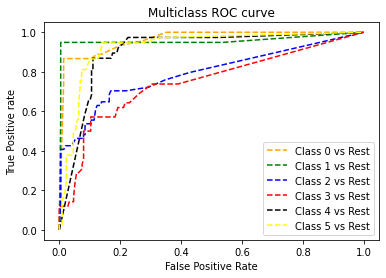

In [737]:
fpr = {}
tpr = {}
thresh ={}
roc_list = []
n_class = 6
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, self_training_model.predict_proba(X_test.drop(['index'],axis=1))[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [738]:
print(classification_report(y_test,self_training_model.predict(X_test.drop(['index'],axis=1))))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.97      0.95      0.96        39
           2       0.61      0.52      0.56        54
           3       0.50      0.19      0.28        42
           4       0.41      0.97      0.58        38
           5       0.61      0.38      0.47        37

    accuracy                           0.64       255
   macro avg       0.67      0.65      0.62       255
weighted avg       0.67      0.64      0.62       255



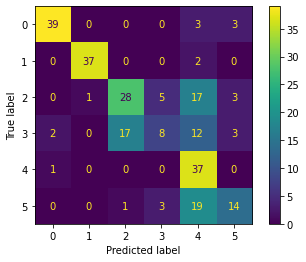

In [739]:
cm= confusion_matrix(y_test,self_training_model.predict(X_test.drop(['index'],axis=1)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## **Final Prediction**

In [740]:
Predict_complete_dataset = X_train.append(X_test)

In [741]:
Predict_complete_dataset

,index,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters
0,966,79.773588,-69.979513,-38.928870,-28.402235,-0.005433,-6.681672,1.601602,0
1,647,59.972748,29.793648,33.223399,67.222148,-23.827987,-21.779601,3.333500,2
2,60,47.094558,54.353240,1.056032,-36.099312,-2.622797,-12.235668,-4.666505,5
3,936,27.643555,7.689321,-37.852916,56.186423,-36.745370,-24.233752,5.971368,5
4,948,58.329517,0.958460,-54.156725,54.431617,-30.828009,-22.624193,-2.116945,0
...,...,...,...,...,...,...,...,...,...
1288,715,-57.153223,-3.980399,-3.497641,8.961009,-4.771648,43.938257,63.462425,1
1289,905,-54.039668,45.684377,-10.177454,-48.767084,-20.683132,-14.353451,-1.994787,3
1290,1096,-53.894467,45.779121,-5.959207,-43.684653,-17.206716,-6.790873,-3.443661,3
1291,235,-73.889754,-3.573323,-9.666384,18.978884,58.136406,-17.969096,-3.122099,1


In [742]:
Final_prediction = self_training_model.predict(Predict_complete_dataset.drop(['index'],axis=1))

In [743]:
Predict_complete_dataset['Predicted_Labels'] = Final_prediction

In [744]:
Shuffled_data['Pred_Labels'] = Predict_complete_dataset['Predicted_Labels']

In [745]:
Shuffled_data

,index,Component0,Component1,Component2,Component3,Component4,Component5,Component6,clusters,team_id,Theme allot,Labels,Pred_Labels
0,966,79.773588,-69.979513,-38.928870,-28.402235,-0.005433,-6.681672,1.601602,0,2453,4,-1.0,4.0
1,647,59.972748,29.793648,33.223399,67.222148,-23.827987,-21.779601,3.333500,2,1901,0,-1.0,0.0
2,60,47.094558,54.353240,1.056032,-36.099312,-2.622797,-12.235668,-4.666505,5,1106,3,-1.0,4.0
3,936,27.643555,7.689321,-37.852916,56.186423,-36.745370,-24.233752,5.971368,5,2409,0,-1.0,0.0
4,948,58.329517,0.958460,-54.156725,54.431617,-30.828009,-22.624193,-2.116945,0,2426,0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,715,-57.153223,-3.980399,-3.497641,8.961009,-4.771648,43.938257,63.462425,1,1988,3,-1.0,2.0
1289,905,-54.039668,45.684377,-10.177454,-48.767084,-20.683132,-14.353451,-1.994787,3,2358,3,-1.0,4.0
1290,1096,-53.894467,45.779121,-5.959207,-43.684653,-17.206716,-6.790873,-3.443661,3,2641,2,-1.0,4.0
1291,235,-73.889754,-3.573323,-9.666384,18.978884,58.136406,-17.969096,-3.122099,1,1356,1,-1.0,1.0
